In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
import numpy as np
from glob import glob
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

import string
from os import listdir
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from pickle import dump
from string import punctuation

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

In [ ]:
#load data
#df = pd.read_csv('/content/drive/MyDrive/Bangla Datasets/FINAL_BANGLA_DB/bengali_Toxic_balance.csv', encoding='UTF-8')
#df = pd.read_csv('/content/drive/MyDrive/Bangla Datasets/FINAL_BANGLA_DB/bengali_Toxic_balance_upload.csv')
#df = pd.read_csv('/content/drive/MyDrive/Bangla Datasets/FINAL_BANGLA_DB/bengali_Toxic_balance_upload_with_augment.csv')
#df = pd.read_csv('/content/drive/MyDrive/Bangla Datasets/FINAL_BANGLA_DB/bengali_Toxic_balance_upload_with_augment_Final_balance_nonTox.csv', encoding='UTF-8')
df = pd.read_csv('/content/drive/MyDrive/465/Multi_labeled_toxic_comments.csv')
#df = df.drop(['Toxic', 'NonToxic'], axis=1 )
#reset index
#df.set_index('id', inplace = True)
df

,text,vulgar,hate,religious,threat,troll,Insult
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0
3,তার উপর ২ জন মেয়র,0,0,0,0,0,0
4,পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
16068,... দুই ছেলে নার্স আর এক মোটা মহিলা নার্স মোটা...,0,0,0,0,0,0
16069,সাফা কবিরের চেহারায় কেউ জুতা মার...,0,0,0,1,0,1
16070,এখন বুঝলাম কেন তোদের কে জবাই করে.....,0,0,0,1,0,0
16071,"পাগলে কিনা কয় ছাগলে কিনা খায়,যাদের দেবতা গরু...",0,0,1,0,1,0


In [ ]:
filter = df["text"] != ""
df = df[filter]
df = df.dropna()

In [ ]:
#df = df.drop(['Toxic', 'NonToxic'], axis=1 )
df = df.sample(frac=1).reset_index(drop=True)
df

,text,vulgar,hate,religious,threat,troll,Insult
0,সাকিব ভাই মদিনাতে কবে আসলেন । ভাই যদি জানতাম য...,0,0,0,0,1,0
1,আরিয়ান আর নিশো ভাই আপনারা বেস্ট স্যালুট আপনাদি...,0,0,0,0,0,0
2,মালাউন এর বাচ্চা তুই কি জানোছ? তুই বাংলা ছাইরা...,1,0,1,0,0,1
3,আজ যদি জনাব ওমর ও আনহু থাকেন আমি ওর কল্লা নামা...,0,0,0,1,0,0
4,অথচ আমরা এই প্রফেশনটাকে ন্যাশনাল লেভেলের ব্র্য...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
16068,এর বাজে পত্রিকা নয়া দিগন্ত।।খানকির পোলারা সব ...,1,0,0,0,0,1
16069,দোয়া করি আল্লাহ যেনো আপনাকে হেদায়েত নসিব করে দ...,0,0,0,0,0,0
16070,আর যদি মেয়েকে সামনে পাই সেদিন তোমার যা রাগ হচ...,0,0,0,1,0,0
16071,য়োরে বাচ্চা টি উইথ দুইটা বুনো খাসী। কুত্তার বা...,1,0,0,0,0,1


In [ ]:
df = df.loc[((df['vulgar'] == 1) | (df['hate'] == 1) | (df['religious'] ==1) | (df['threat'] == 1) | (df['troll'] == 1) | (df['Insult'] ==1))]

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,text,vulgar,hate,religious,threat,troll,Insult
0,বহুদিন ধরে বহু পথ ঘুরে বহু ব্যয় করে বহুদেশ ঘু...,1,0,0,0,0,1
1,তোর মুখে গরু দিয়ে প্রসাব করাবো,0,0,0,0,0,1
2,পূজার ধর্ষকের ফাসি চাই সকল নারী নির্যাতনের বিচ...,0,0,1,0,0,0
3,আওয়ামী লীগ মানে বিনোদন সব পাগল আওয়ামী লীগ,0,0,0,0,1,0
4,মার সালার মালাউনের বাচ্চা হিন্দুদের।,0,0,1,0,0,0
...,...,...,...,...,...,...,...
8483,কথা হইল গিয়া দেশের অলিতে গলিতে চিপায় চুপায় মাঠ...,0,1,0,0,0,0
8484,তরে জুতা পেটা করা লাগব খারাপ মেয়ে। এখন দেখতাছে...,0,0,0,1,0,1
8485,লেংটা হতে মন চাইলে একটু কাপর পরলি কেন? তরে জুত...,0,0,0,1,0,1
8486,"দারুন দুধ গুলি অনেক বড়ো, আহা খাবো, কি মজা হবে?",1,0,0,0,0,0


In [ ]:
df = df.reset_index(drop=True)
df

,text,vulgar,hate,religious,threat,troll,Insult
0,বহুদিন ধরে বহু পথ ঘুরে বহু ব্যয় করে বহুদেশ ঘু...,1,0,0,0,0,1
1,তোর মুখে গরু দিয়ে প্রসাব করাবো,0,0,0,0,0,1
2,পূজার ধর্ষকের ফাসি চাই সকল নারী নির্যাতনের বিচ...,0,0,1,0,0,0
3,আওয়ামী লীগ মানে বিনোদন সব পাগল আওয়ামী লীগ,0,0,0,0,1,0
4,মার সালার মালাউনের বাচ্চা হিন্দুদের।,0,0,1,0,0,0
...,...,...,...,...,...,...,...
8483,কথা হইল গিয়া দেশের অলিতে গলিতে চিপায় চুপায় মাঠ...,0,1,0,0,0,0
8484,তরে জুতা পেটা করা লাগব খারাপ মেয়ে। এখন দেখতাছে...,0,0,0,1,0,1
8485,লেংটা হতে মন চাইলে একটু কাপর পরলি কেন? তরে জুত...,0,0,0,1,0,1
8486,"দারুন দুধ গুলি অনেক বড়ো, আহা খাবো, কি মজা হবে?",1,0,0,0,0,0


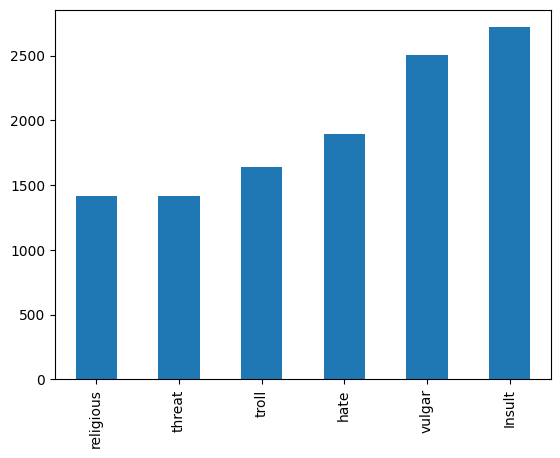

In [ ]:
LABEL_COLUMNS = df.columns.tolist()[1:]
df[LABEL_COLUMNS].sum().sort_values().plot(kind="bar");

In [ ]:
df[LABEL_COLUMNS].sum()

vulgar       2505
hate         1898
religious    1418
threat       1419
troll        1643
Insult       2719
dtype: int64

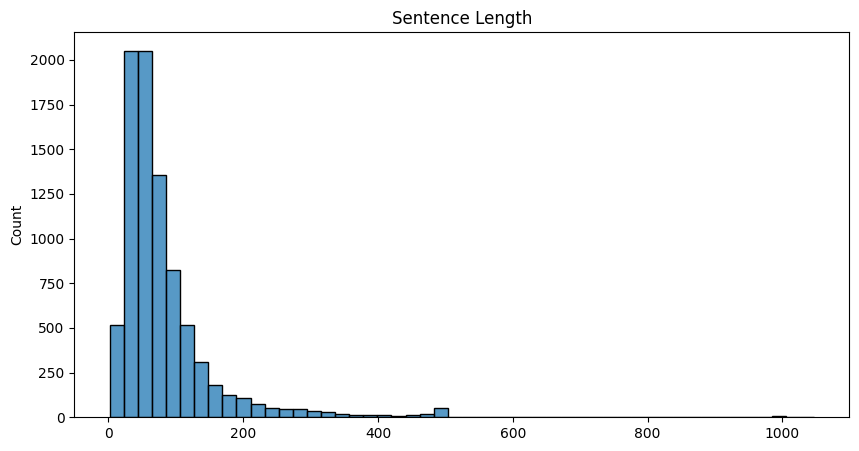

In [ ]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=50)
plt.title('Sentence Length')
plt.show()

In [ ]:
stop_word_list = (stopwords.words('bengali'))

In [ ]:
import string

# turn a doc into clean tokens
def clean_doc(doc):
	doc = doc.replace("”","")
	doc = doc.replace("“","")
	# split into tokens by white space
	tokens = doc.split()

	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]

	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if not word.isalpha()]

	# filter out stop words
	stop_words = stop_word_list
	tokens = [w for w in tokens if not w in stop_words]

	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	tokens = ' '.join(tokens)
	return tokens

In [ ]:
df['text'] = df.text.apply(clean_doc)
df

,text,vulgar,hate,religious,threat,troll,Insult
0,বহুদিন ঘুরে ব্যয় বহুদেশ ঘুরে দেখিতে গিয়াছি ব...,1,0,0,0,0,1
1,তোর মুখে গরু দিয়ে প্রসাব করাবো,0,0,0,0,0,1
2,পূজার ধর্ষকের ফাসি চাই নারী নির্যাতনের বিচার চ...,0,0,1,0,0,0
3,আওয়ামী লীগ মানে বিনোদন পাগল আওয়ামী লীগ,0,0,0,0,1,0
4,মার সালার মালাউনের বাচ্চা হিন্দুদের।,0,0,1,0,0,0
...,...,...,...,...,...,...,...
8483,কথা গিয়া দেশের অলিতে গলিতে চিপায় চুপায় মাঠে ঘা...,0,1,0,0,0,0
8484,তরে জুতা পেটা লাগব খারাপ মেয়ে। দেখতাছে জনপ্রিয়...,0,0,0,1,0,1
8485,লেংটা চাইলে একটু কাপর পরলি তরে জুতানো দরকার,0,0,0,1,0,1
8486,দারুন দুধ বড়ো আহা খাবো মজা,1,0,0,0,0,0


In [ ]:
sample_row = df.iloc[120]
sample_comment = sample_row.text
sample_labels = sample_row[LABEL_COLUMNS]

print(sample_comment)
print(sample_labels.to_dict())

ব্যান হারামজাদারা
{'vulgar': 1, 'hate': 0, 'religious': 0, 'threat': 1, 'troll': 0, 'Insult': 0}


**Train Test Split**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
%%capture
!pip3 install iterative-stratification
!pip install scikit-multilearn

In [ ]:
X = df['text']

In [ ]:
y = df[['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult']]
y

,vulgar,hate,religious,threat,troll,Insult
0,1,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
8483,0,1,0,0,0,0
8484,0,0,0,1,0,1
8485,0,0,0,1,0,1
8486,1,0,0,0,0,0


In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
msss = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.40, random_state=42)
for train_index, test_index in msss.split(X, y):
        x_train, x_test_temp = X[train_index], X[test_index]
        y_train, y_test_temp = y[train_index], y[test_index]

In [ ]:
msss = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.4, random_state=42)
for val_index, test_index in msss.split(x_test_temp, y_test_temp):
        x_val, x_test = X[val_index], X[test_index]
        y_val, y_test = y[val_index], y[test_index]

In [ ]:
'''# open the file in read binary mode
train_file = open("/kaggle/input/toxicdb-array/x_train", "rb")
val_file = open("/kaggle/input/toxicdb-array/x_val", "rb")
test_file = open("/kaggle/input/toxicdb-array/x_test", "rb")

#read the file to numpy array
x_train = np.load(train_file, allow_pickle=True)
x_val = np.load(val_file, allow_pickle=True)
x_test = np.load(test_file, allow_pickle=True)

#close the file
train_file.close
val_file.close
test_file.close'''

'# open the file in read binary mode\ntrain_file = open("/kaggle/input/toxicdb-array/x_train", "rb")\nval_file = open("/kaggle/input/toxicdb-array/x_val", "rb")\ntest_file = open("/kaggle/input/toxicdb-array/x_test", "rb")\n\n#read the file to numpy array\nx_train = np.load(train_file, allow_pickle=True)\nx_val = np.load(val_file, allow_pickle=True)\nx_test = np.load(test_file, allow_pickle=True)\n\n#close the file\ntrain_file.close\nval_file.close\ntest_file.close'

In [ ]:
'''# open the file in read binary mode
train_label = open("/kaggle/input/toxicdb-array/y_train", "rb")
val_label = open("/kaggle/input/toxicdb-array/y_val", "rb")
test_label = open("/kaggle/input/toxicdb-array/y_test", "rb")

#read the file to numpy array
y_train = np.load(train_label, allow_pickle=True)
y_val = np.load(val_label, allow_pickle=True)
y_test = np.load(test_label, allow_pickle=True)

#close the file
train_label.close
val_label.close
test_label.close'''

'# open the file in read binary mode\ntrain_label = open("/kaggle/input/toxicdb-array/y_train", "rb")\nval_label = open("/kaggle/input/toxicdb-array/y_val", "rb")\ntest_label = open("/kaggle/input/toxicdb-array/y_test", "rb")\n\n#read the file to numpy array\ny_train = np.load(train_label, allow_pickle=True)\ny_val = np.load(val_label, allow_pickle=True)\ny_test = np.load(test_label, allow_pickle=True)\n\n#close the file\ntrain_label.close\nval_label.close\ntest_label.close'

In [ ]:
train_text = pd.DataFrame(x_train, columns = ['text'])
train_label = pd.DataFrame(y_train, columns = ['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult'])
train_df = pd.concat([train_text, train_label], axis=1, join='inner')
train_df = train_df.loc[((train_df['vulgar'] == 1) | (train_df['hate'] == 1) | (train_df['religious'] ==1) | (train_df['threat'] == 1) | (train_df['troll'] == 1) | (train_df['Insult'] ==1))]
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

,text,vulgar,hate,religious,threat,troll,Insult
0,মালুরা উঠে দাড়াতে অবস্থা করো। পৃথিবীর সবচেয়ে ন...,0,0,1,0,0,0
1,গরুর গাড়িতে পাঠানো পারতো,0,0,0,0,1,0
2,গ্রামে ধরনের মহিলা কাজই অন্যের সংসারে আগুন লাগ...,0,0,0,0,1,0
3,ভারত পাকিস্তান যুদ্ধ ইউরোপ আমেরিকার ষড়যন্ত্র ।...,0,1,0,0,0,0
4,মেয়ের জাত নামের কলংক তোরা তোরা পতিতালয় থাকছঐ ম...,1,0,0,0,0,1
...,...,...,...,...,...,...,...
5101,ভক্সোদ রে বহুতদিন দেখলাম,1,0,0,0,0,0
5102,তোর আল্লাহর বাড়া কাটা অবস্তাই জন্ম দিতে।,1,0,1,0,0,1
5103,মিয়ারমার হারামি রাষ্ট্র। পৃথিবীর মানচিত্র নাম ...,0,0,0,1,0,0
5104,১৯৭১ সালে ভারত পাকিস্তান থাপ্পড় মেরে টুকরো কর...,0,1,0,0,0,0


In [ ]:
x_train = train_df['text']
y_train = train_df[['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult']]
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [ ]:
val_text = pd.DataFrame(x_val, columns = ['text'])
val_label = pd.DataFrame(y_val, columns = ['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult'])
val_df = pd.concat([val_text, val_label], axis=1, join='inner')
val_df = val_df.loc[((val_df['vulgar'] == 1) | (val_df['hate'] == 1) | (val_df['religious'] ==1) | (val_df['threat'] == 1) | (val_df['troll'] == 1) | (val_df['Insult'] ==1))]
val_df = val_df.sample(frac=1).reset_index(drop=True)
val_df

,text,vulgar,hate,religious,threat,troll,Insult
0,নীচের জামা খুলে লেংটা রাখছে ভাল লাগবে,1,0,0,0,0,0
1,ইয়াবা দিয়া চুদি,1,0,0,0,0,0
2,ভক্ত,0,1,0,0,0,0
3,আচ্ছা আপু তোমাকে বোতল বিষ কিনে দিচ্ছি টুক গিলে...,0,0,0,0,1,0
4,পরিচালক ভাই পায়েল বারে লেংটা,1,0,0,0,0,1
...,...,...,...,...,...,...,...
2016,আবাল ছিলা আবাল আছো আবালই থাকবা,0,0,0,0,0,1
2017,জবাই অভ্যাস হইয়া,0,1,0,0,0,0
2018,পাকির দালল গুলারে জুতা মারা,0,0,0,0,0,1
2019,নওশীন আপুর দূদূ দেখলে মাথা ব্যাথা,1,0,0,0,0,0


In [ ]:
x_val = val_df['text']
y_val = val_df[['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult']]
x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
test_text = pd.DataFrame(x_test, columns = ['text'])
test_label = pd.DataFrame(y_test, columns = ['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult'])
test_df = pd.concat([test_text, test_label], axis=1, join='inner')
test_df = test_df.loc[((test_df['vulgar'] == 1) | (test_df['hate'] == 1) | (test_df['religious'] ==1) | (test_df['threat'] == 1) | (test_df['troll'] == 1) | (test_df['Insult'] ==1))]
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df

,text,vulgar,hate,religious,threat,troll,Insult
0,নাস্তিকদের ইসলামের বদনাম করাতবে,0,0,1,0,0,0
1,বাংলাদেশ দান ভারতকে,0,0,0,0,1,0
2,ভারত দেশটা ডংশ দিচ্ছে হাসিনা খমতার লোভে ভারত গ...,0,1,0,0,0,0
3,নিয়ম অপরাধ বৈধতা পাবে নিয়ম ভারতের চালুর কোনো...,0,1,0,0,0,0
4,ভারতকে ধবংস দাও। মা কালী সর্গে ডাকছে। তাড়াতাড়ি...,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1356,মুখে লাথি মারা পাগলী কোথাকার,0,0,0,0,0,1
1357,ভারত কুটি কিনলে লাভ মালাউন আসবেনা ।বড় বাপ পাক চীন,0,0,1,0,0,0
1358,লাখ অবৈধ ভারতিয় অবৈধ সোনার বাংলাদেশ প্রতিদিন ট...,0,1,0,0,0,0
1359,হিন্দু ধর্ম চোদাচুদির ধর্ম এইজন্য ইন্ডিয়াতে সব...,1,0,1,0,0,1


In [ ]:
x_test = test_df['text']
y_test = test_df[['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult']]
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
print("Data ->Vulgar, Hate, Religious, Threat, Troll, Insult")
print("Train: ", y_train.sum(axis = 0))
print("Validation: ", y_val.sum(axis = 0))
print("Test: ", y_test.sum(axis = 0))

Data ->Vulgar, Hate, Religious, Threat, Troll, Insult
Train:  [1503 1139  851  851  986 1631]
Validation:  [601 439 346 351 376 634]
Test:  [402 323 217 219 273 439]


In [ ]:
y_test

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
len(x_train), len(x_val), len(x_test)

(5106, 2021, 1361)

In [ ]:
len(y_train), len(y_val), len(y_test)

(5106, 2021, 1361)

**BERT WORD EMBEDDING**

In [ ]:
%%capture
!pip3 install transformers
#!pip install transformers

In [ ]:
from transformers import AutoModelForPreTraining, AutoTokenizer
from transformers import BertTokenizer, TFBertModel

In [ ]:
# hyperparameters
max_length = 100
batch_size = 16
#dev_size = 0.2

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

In [ ]:
X_input_ids_train = np.zeros((len(x_train), max_length))
X_attn_masks_train = np.zeros((len(x_train), max_length))

X_input_ids_dev = np.zeros((len(x_val), max_length))
X_attn_masks_dev = np.zeros((len(x_val), max_length))

X_input_ids_test = np.zeros((len(x_test), max_length))
X_attn_masks_test = np.zeros((len(x_test), max_length))

In [ ]:
from tqdm import tqdm
def preprocessing_dataset(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=max_length,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
X_input_ids_tain, X_attn_masks_tain = preprocessing_dataset(x_train, X_input_ids_train, X_attn_masks_train, tokenizer)
X_input_ids_dev, X_attn_masks_dev = preprocessing_dataset(x_val, X_input_ids_dev, X_attn_masks_dev, tokenizer)
X_input_ids_test, X_attn_masks_test = preprocessing_dataset(x_test, X_input_ids_test, X_attn_masks_test, tokenizer)

5106it [00:05, 854.20it/s] 
2021it [00:01, 1189.80it/s]
1361it [00:02, 488.71it/s]


In [ ]:
X_input_ids_tain[990]

array([  101., 11217.,  2991.,  3447., 21761.,  2094.,  6871.,  2076.,
       27551.,   102.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_input_ids_tain, X_attn_masks_tain, y_train))
dev_dataset = tf.data.Dataset.from_tensor_slices((X_input_ids_dev, X_attn_masks_dev, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_input_ids_test, X_attn_masks_test, y_test))

In [ ]:
def VulgarDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [ ]:
train_dataset = train_dataset.map(VulgarDatasetMapFunction)
dev_dataset = dev_dataset.map(VulgarDatasetMapFunction)
test_dataset = test_dataset.map(VulgarDatasetMapFunction)

In [ ]:
train_dataset = train_dataset.shuffle(100).batch(batch_size)
dev_dataset = dev_dataset.shuffle(100).batch(batch_size)
test_dataset = test_dataset.shuffle(100).batch(batch_size)


In [ ]:
import tensorflow as tf
# from keras.optimizers import adam_v2
'''from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential'''
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
# from keras.layers import CuDNNLSTM

In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import LSTM
from keras.layers import MaxPooling1D
from keras.layers import concatenate
from pickle import load

from keras.layers import Conv1D, MaxPooling2D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed

In [ ]:
#Import necessary libraries
# demonstration of calculating metrics for a neural network model using sklearn
import keras.backend as K
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.metrics import Metric


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0.0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

In [ ]:
from keras import initializers as initializers, regularizers, constraints
REG_PARAM = 1e-13
#l2_reg = regularizers.l2(REG_PARAM)

Relu + Adam + Dropout 0.2 + L2 + BN

In [ ]:
def bert_model_relu_bn():
    bert_encoder = TFBertModel.from_pretrained("sagorsarker/bangla-bert-base")
    input_word_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    attn_masks = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

    encoder_embedding_layer = bert_encoder(input_word_ids, attention_mask=attn_masks)[0]

    conv1D_1 = tf.keras.layers.Conv1D(512, 4, activation='relu',name='con1')(encoder_embedding_layer)
    batch_norm_1 = tf.keras.layers.BatchNormalization(name='batch_norm_1')(conv1D_1)
    maxPool1D_1 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool1')(batch_norm_1)

    conv1D_2 = tf.keras.layers.Conv1D(256, 3, activation='relu',name='con2')(maxPool1D_1)
    batch_norm_2 = tf.keras.layers.BatchNormalization(name='batch_norm_2')(conv1D_2)
    maxPool1D_2 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool2')(batch_norm_2)

    conv1D_3 = tf.keras.layers.Conv1D(128, 2, activation='relu',name='con3')(maxPool1D_2)
    batch_norm_3 = tf.keras.layers.BatchNormalization(name='batch_norm_3')(conv1D_3)
    maxPool1D_3 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool3')(batch_norm_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = keras.layers.wrappers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True)
    )(maxPool1D_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = Bidirectional(keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(REG_PARAM)))(maxPool1D_3)



    # Attention Mechanism - Generate attention vectors
    #attention_output = AttentionLayer(lstm_outs)
    input_dim = int(lstm_outs.shape[2])
    permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
    attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
    #print(attention_vector.shape)
    attention_vector = keras.layers.Reshape((attention_vector.shape[1],))(attention_vector)
    attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('relu', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('tanh', name='attention_vec')(attention_vector)
    attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

    # Last layer: fully connected with softmax activation

    dropout = tf.keras.layers.Dropout(0.2, name='dropout')(attention_output)

    fc = keras.layers.Dense(64, activation='relu')(dropout)
    output = keras.layers.Dense(6, activation='sigmoid')(fc)

    # Finally building model
    model = keras.Model(inputs=[input_word_ids, attn_masks], outputs=output)


    return model

In [ ]:
model_relu_bn = bert_model_relu_bn()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
model_relu_bn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              #optimizer=tf.keras.optimizers.Adam(1e-5),
              optimizer=tf.keras.optimizers.legacy.Adam(1e-5),
              metrics=['accuracy', fmeasure, precision, recall])

model_relu_bn.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 100)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_4 (TFBertMod  TFBaseModelOutputWithPooli   1643965   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   44         'attention_mask[0][0]']      
                             hidden_state=(None, 100, 7                                     

In [79]:
history_relu_bn = model_relu_bn.fit(
    train_dataset,
    batch_size=16,
    epochs=10,
    validation_data=dev_dataset,
    validation_steps=20,
    verbose=1)

Epoch 1/10


320/320 [==============================] - 156s 415ms/step - loss: 0.5622 - accuracy: 0.3188 - fmeasure: 0.4373 - precision: 0.4673 - recall: 0.4231 - val_loss: 0.4655 - val_accuracy: 0.4812 - val_fmeasure: 0.5437 - val_precision: 0.6091 - val_recall: 0.5019
Epoch 2/10
320/320 [==============================] - 127s 395ms/step - loss: 0.4250 - accuracy: 0.4931 - fmeasure: 0.5603 - precision: 0.6917 - recall: 0.4763 - val_loss: 0.3691 - val_accuracy: 0.5500 - val_fmeasure: 0.6017 - val_precision: 0.7284 - val_recall: 0.5198
Epoch 3/10
320/320 [==============================] - 127s 396ms/step - loss: 0.3576 - accuracy: 0.6095 - fmeasure: 0.6329 - precision: 0.7684 - recall: 0.5436 - val_loss: 0.3251 - val_accuracy: 0.6531 - val_fmeasure: 0.6838 - val_precision: 0.7553 - val_recall: 0.6275
Epoch 4/10
 78/320 [======>.......................] - ETA: 1:34 - loss: 0.3311 - accuracy: 0.6458 - fmeasure: 0.6720 - precision: 0.7955 - recall: 0.5873

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(16, 8))
plt.suptitle('Relu + Adam + Dropout 0.2 + L1 + BN', fontsize = 16, fontweight = 'bold')
plt.subplot(1, 2, 1)
plot_graphs(history_relu, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_relu, 'loss')
plt.ylim(0, None)

Relu + Adam + Dropout 0.2 + L2

In [ ]:
def bert_model():
    bert_encoder = TFBertModel.from_pretrained("sagorsarker/bangla-bert-base")
    input_word_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    attn_masks = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

    encoder_embedding_layer = bert_encoder(input_word_ids, attention_mask=attn_masks)[0]

    conv1D_1 = tf.keras.layers.Conv1D(512, 4, activation='relu',name='con1')(encoder_embedding_layer)
    maxPool1D_1 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool1')(conv1D_1)

    conv1D_2 = tf.keras.layers.Conv1D(256, 3, activation='relu',name='con2')(maxPool1D_1)
    maxPool1D_2 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool2')(conv1D_2)

    conv1D_3 = tf.keras.layers.Conv1D(128, 2, activation='relu',name='con3')(maxPool1D_2)
    maxPool1D_3 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool3')(conv1D_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = keras.layers.wrappers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True)
    )(maxPool1D_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = Bidirectional(keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l1(REG_PARAM)))(maxPool1D_3)



    # Attention Mechanism - Generate attention vectors
    #attention_output = AttentionLayer(lstm_outs)
    input_dim = int(lstm_outs.shape[2])
    permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
    attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
    #print(attention_vector.shape)
    attention_vector = keras.layers.Reshape((attention_vector.shape[1],))(attention_vector)
    attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('relu', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('tanh', name='attention_vec')(attention_vector)
    attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

    # Last layer: fully connected with softmax activation

    dropout = tf.keras.layers.Dropout(0.2, name='dropout')(attention_output)

    fc = keras.layers.Dense(64, activation='relu')(dropout)
    output = keras.layers.Dense(6, activation='sigmoid')(fc)

    # Finally building model
    model = keras.Model(inputs=[input_word_ids, attn_masks], outputs=output)


    return model

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              #optimizer=tf.keras.optimizers.Adam(1e-5),
              optimizer=tf.keras.optimizers.legacy.Adam(1e-5),
              metrics=['accuracy', fmeasure, precision, recall])

model.summary()

In [ ]:
history = model.fit(
    train_dataset,
    batch_size=16,
    epochs=10,
    validation_data=dev_dataset,
    validation_steps=20,
    verbose=1)

In [ ]:
plt.figure(figsize=(16, 8))
plt.suptitle('Relu + Adam + Dropout 0.2 + L2', fontsize = 16, fontweight = 'bold')
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
model.save_weights("/kaggle/working/CNN_BiLSTM_ATTENTION_Multi80")

Visualization

In [ ]:
y_pred = model.predict([X_input_ids_test, X_attn_masks_test])

In [ ]:
Threshold = 0.5
upper, lower = 1, 0

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
y_pred1 = y_pred
y_true = y_test



y_pred1 = np.where(y_pred >= .5, upper, lower)

print(classification_report(
  y_true,
  y_pred1,
  digits = 4,
  target_names=LABEL_COLUMNS,
  zero_division=0
))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
conf_mat = multilabel_confusion_matrix(y_test, y_pred1)
print(conf_mat)

In [ ]:
def multilabel_accuracies(p):
    TP = p[1][1]
    TN = p[0][0]
    FP = p[0][1]
    FN = p[1][0]
    acc = (TP + TN) / (TP + TN + FP + FN)
    print(acc)

In [ ]:
vulgar = conf_mat[0]
hate = conf_mat[1]
religious = conf_mat[2]
threat = conf_mat[3]
troll = conf_mat[4]
insult = conf_mat[5]

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


cm_vulgar = metrics.ConfusionMatrixDisplay(confusion_matrix = vulgar, display_labels = ['Not Vulgar', 'Vulgar'])
cm_hate = metrics.ConfusionMatrixDisplay(confusion_matrix = hate, display_labels = ['Not Hate', 'Hate'])
cm_religious = metrics.ConfusionMatrixDisplay(confusion_matrix = religious, display_labels = ['Not Religious', 'Religious'])
cm_threat = metrics.ConfusionMatrixDisplay(confusion_matrix = threat, display_labels = ['Not Threat', 'Threat'])
cm_troll = metrics.ConfusionMatrixDisplay(confusion_matrix = troll, display_labels = ['Not Troll', 'Troll'])
cm_insult = metrics.ConfusionMatrixDisplay(confusion_matrix = insult, display_labels = ['Not Insult', 'Insult'])

cm_vulgar.plot()
cm_hate.plot()
cm_religious.plot()
cm_threat.plot()
cm_troll.plot()
cm_insult.plot()

plt.show()

GELU + Adam + Dropout 0.3 + L2

In [ ]:
def bert_model_gelu():
    bert_encoder = TFBertModel.from_pretrained("sagorsarker/bangla-bert-base")
    input_word_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    attn_masks = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

    encoder_embedding_layer = bert_encoder(input_word_ids, attention_mask=attn_masks)[0]

    conv1D_1 = tf.keras.layers.Conv1D(512, 4, activation='gelu',name='con1')(encoder_embedding_layer)
    maxPool1D_1 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool1')(conv1D_1)

    conv1D_2 = tf.keras.layers.Conv1D(256, 3, activation='gelu',name='con2')(maxPool1D_1)
    maxPool1D_2 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool2')(conv1D_2)

    conv1D_3 = tf.keras.layers.Conv1D(128, 2, activation='gelu',name='con3')(maxPool1D_2)
    maxPool1D_3 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool3')(conv1D_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = keras.layers.wrappers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True)
    )(maxPool1D_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = Bidirectional(keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(REG_PARAM)))(maxPool1D_3)



    # Attention Mechanism - Generate attention vectors
    #attention_output = AttentionLayer(lstm_outs)
    input_dim = int(lstm_outs.shape[2])
    permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
    attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
    #print(attention_vector.shape)
    attention_vector = keras.layers.Reshape((attention_vector.shape[1],))(attention_vector)
    attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('relu', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('tanh', name='attention_vec')(attention_vector)
    attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

    # Last layer: fully connected with softmax activation

    dropout = tf.keras.layers.Dropout(0.3, name='dropout')(attention_output)

    fc = keras.layers.Dense(64, activation='gelu')(dropout)
    output = keras.layers.Dense(6, activation='sigmoid')(fc)

    # Finally building model
    model = keras.Model(inputs=[input_word_ids, attn_masks], outputs=output)


    return model

In [ ]:
gelu_model = bert_model_gelu()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
gelu_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              #optimizer=tf.keras.optimizers.Adam(1e-5),
              optimizer=tf.keras.optimizers.legacy.Adam(1e-5),
              metrics=['accuracy', fmeasure, precision, recall])

gelu_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 100)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1643965   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   44         'attention_mask[0][0]']      
                             hidden_state=(None, 100, 7                                       

In [ ]:
history_gelu = gelu_model.fit(
    train_dataset,
    batch_size=16,
    epochs=10,
    validation_data=dev_dataset,
    validation_steps=20,
    verbose=1)

Epoch 1/10


319/319 [==============================] - 153s 383ms/step - loss: 0.4770 - accuracy: 0.3314 - fmeasure: 0.2853 - precision: 0.5814 - recall: 0.2050 - val_loss: 0.3802 - val_accuracy: 0.5969 - val_fmeasure: 0.5392 - val_precision: 0.8027 - val_recall: 0.4187
Epoch 2/10
319/319 [==============================] - 121s 380ms/step - loss: 0.3746 - accuracy: 0.5863 - fmeasure: 0.5782 - precision: 0.7518 - recall: 0.4799 - val_loss: 0.3183 - val_accuracy: 0.6625 - val_fmeasure: 0.7042 - val_precision: 0.7676 - val_recall: 0.6578
Epoch 3/10
319/319 [==============================] - 122s 382ms/step - loss: 0.3194 - accuracy: 0.6731 - fmeasure: 0.6874 - precision: 0.7809 - recall: 0.6212 - val_loss: 0.2941 - val_accuracy: 0.7312 - val_fmeasure: 0.7548 - val_precision: 0.7699 - val_recall: 0.7487
Epoch 4/10
319/319 [==============================] - 123s 384ms/step - loss: 0.2735 - accuracy: 0.7410 - fmeasure: 0.7602 - precision: 0.8172 - recall: 0.7155 - val_loss: 0.2587 - val_accuracy: 0.7656

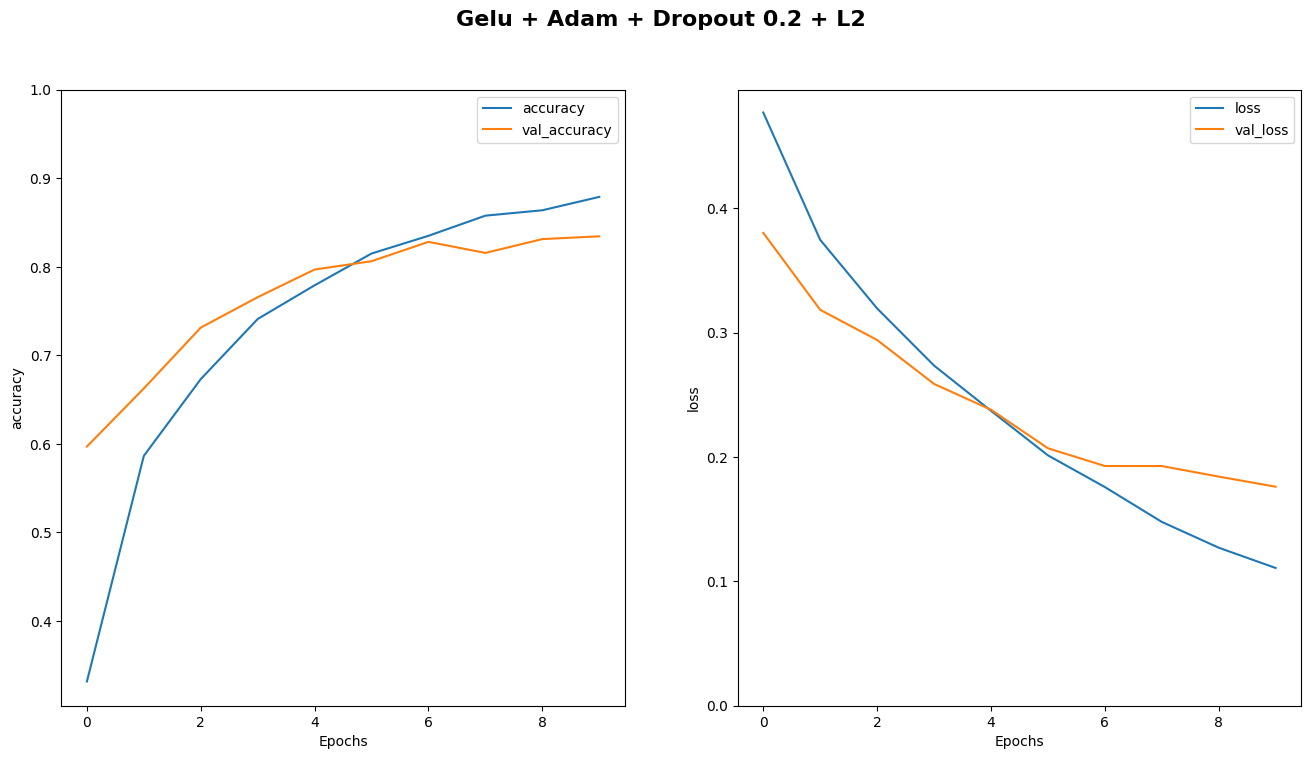

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_gelu, 'accuracy')
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plot_graphs(history_gelu, 'loss')
plt.ylim(0, None)
suptitle = plt.suptitle("Gelu + Adam + Dropout 0.2 + L2")
plt.setp(suptitle, fontsize=16, fontweight="bold")

plt.show()

In [ ]:
!zip -r CNN_BiLSTM_ATTENTION_Multi80.zip "/kaggle/working/"

In [ ]:
model1 = model

In [ ]:
model1.load_weights("/kaggle/input/savedmodel/CNN_LSTM_ATTENTION_BERT_WITH_ATTENTION_UPD")

In [ ]:
#sample_text = ['খানকির পুলা', 'মেরে সাফা করে ফেল', 'নাটকটা খুব সুন্দর আমার খুব ভাল লেগেছে']
#sample_text = bert_encode(['নাটকটা খুব সুন্দর আমার খুব ভাল লেগেছে'])


In [ ]:
LABEL_COLUMNS

Predicting New Sentence

In [ ]:
def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=300,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=LABEL_COLUMNS):
    probs = model.predict(processed_data)[0]
    return np.where(probs >= Threshold, upper, lower)

input_text = clean_doc('ভারত রেন্ডিমাগি পাকিস্তান খাংকীমাগির পুত। মরুক দুই বানচোত।')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(model1, processed_data=processed_data)
print(f"Classification results: {result}")

Explain With XAI

In [ ]:
%%capture
!pip3 install lime

In [ ]:
from lime.lime_text import LimeTextExplainer
class_names=['vulgar', 'hate', 'religious', 'threat', 'troll', 'insult']
explainer= LimeTextExplainer(class_names=class_names, split_expression=' ')

def predict_proba(arr):
    total_preds=[]
    for i in arr:
        tokens = prepare_data(i, tokenizer)
        preds = model1.predict(tokens)[0]
        total_preds.append(preds)

    returnable = []
    for i in total_preds:
        temp = i
        returnable.append(np.array(temp))

    return np.array(returnable)

In [ ]:
%%capture
sentence = clean_doc('কি হিংসে হয়')
exp = explainer.explain_instance(sentence, predict_proba, num_features=10, num_samples=400, labels=[0, 1, 2, 3, 4, 5])

In [ ]:
print('Text: কি হিংসে হয়')
exp.show_in_notebook(text=True, show_predicted_value=True, predict_proba=True)

In [ ]:
%%capture
sentence = clean_doc('খানকির পো এডমিন তুই কি সবাইরে খোকা খুকু মনে করস? ঠাকুমার ঝুলির গল্প শোনাইতে আইসো ।')
exp = explainer.explain_instance(sentence, predict_proba, num_features=10, num_samples=400, labels=[0, 5])

In [ ]:
print('Text: খানকির পো এডমিন তুই কি সবাইরে খোকা খুকু মনে করস? ঠাকুমার ঝুলির গল্প শোনাইতে আইসো ।')
exp.show_in_notebook(text=True)

In [ ]:
print('Text: মাদারটোস্ট পান্জাবী এইটা আর কয়বছর গায়ে দিবি??')
sentence = clean_doc('মাদারটোস্ট পান্জাবী এইটা আর কয়বছর গায়ে দিবি??')
exp = explainer.explain_instance(sentence, predict_proba, num_features=40, num_samples=400, labels=[0, 1, 2, 3, 4, 5])

In [ ]:
print('Text: মাদারটোস্ট পান্জাবী এইটা আর কয়বছর গায়ে দিবি??')
exp.show_in_notebook(text=True)

In [ ]:
sentence = 'ধর্ম নিয়ে ব্যবসা'
exp = explainer.explain_instance(sentence, predict_proba, num_features=40, num_samples=400, labels=[0, 1, 2, 3, 4, 5])

In [ ]:
exp.show_in_notebook(text=True)

In [ ]:
exp_label = exp.available_labels()

for i in exp_label:
    print(LABEL_COLUMNS[i], " ",exp.as_list(label=i), end="\n\n")

In [ ]:
exp.predict_proba

In [ ]:
#%% ROC-AUC Curve

#y_score = cv_model.predict_proba(X_test)
y_score = model.predict([X_input_ids_test, X_attn_masks_test])

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 6 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
plt.plot(fpr[3], tpr[3], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3]) # Drawing Curve according to 3. class
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [ ]:
class_names=['vulgar', 'hate', 'religious', 'threat', 'troll', 'insult']
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

k = 0
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class '+ class_names[k] + ' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    k = k+1

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()